In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split as tts

# Loading Data Set

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

# Extracting Basic Information about Data

In [3]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [4]:
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


### Data Dictionary

<table border="1" cellpadding=" 1" cellspacing="1" width="830">
    <tbody>
        <tr>
            <td width="164">
                <p><strong>Variable</strong></p>
            </td>
            <td width="647">
                <p><strong>Definition</strong></p>
            </td>
        </tr>
        <tr>
            <td width="164">
                <p>Trip_ID</p>
            </td>
            <td width="647">
                <p>ID for TRIP (Can not be used for purposes of modelling)</p>
            </td>
        </tr>
        <tr>
            <td width="164">
                <p>Trip_Distance</p>
            </td>
            <td width="647">
                <p>The distance for the trip requested by the customer</p>
            </td>
        </tr>
        <tr>
            <td width="164">
                <p>Type_of_Cab</p>
            </td>
            <td width="647">
                <p>Category of the cab requested by the customer</p>
            </td>
        </tr>
        <tr>
            <td width="164">
                <p>Customer_Since_Months</p>
            </td>
            <td width="647">
                <p>Customer using cab services since n months; 0 month means current month</p>
            </td>
        </tr>
        <tr>
            <td width="164">
                <p>Life_Style_Index</p>
            </td>
            <td width="647">
                <p>Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour</p>
            </td>
        </tr>
        <tr>
            <td width="164">
                <p>Confidence_Life_Style_Index</p>
            </td>
            <td width="647">
                <p>Category showing confidence on the index mentioned above</p>
            </td>
        </tr>
        <tr>
            <td width="164">
                <p>Destination_Type</p>
            </td>
            <td width="647">
                <p>Sigma Cabs divides any destination in one of the 14 categories.</p>
            </td>
        </tr>
        <tr>
            <td width="164">
                <p>Customer_Rating</p>
            </td>
            <td width="647">
                <p>Average of life time ratings of the customer till date</p>
            </td>
        </tr>
        <tr>
            <td width="164">
                <p>Cancellation_Last_1Month</p>
            </td>
            <td width="647">
                <p>Number of trips cancelled by the customer in last 1 month</p>
            </td>
        </tr>
        <tr>
            <td width="164">
                <p>Var1, Var2 and Var3</p>
            </td>
            <td width="647">
                <p>Continuous variables masked by the company. Can be used for modelling purposes</p>
            </td>
        </tr>
        <tr>
            <td width="164">
                <p>Gender</p>
            </td>
            <td width="647">
                <p>Gender of the customer</p>
            </td>
        </tr>
        <tr>
            <td width="164">
                <p>Surge_Pricing_Type</p>
            </td>
            <td width="647">
                <p>Predictor variable can be of 3 types</p>
            </td>
        </tr>
    </tbody>
</table>

In [5]:
train.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

# Finding Anomalies in Data Set

### 1) Missing Values

In [3]:
Missing_Values=train.isna().sum().to_frame()

In [4]:
Missing_Values.rename(columns={0:'Total'},inplace=True)

In [5]:
Missing_Values['Total_Perc']=(Missing_Values.Total*100)/train.shape[0]

In [6]:
Missing_Values

,Total,Total_Perc
Trip_ID,0,0.000000
Trip_Distance,0,0.000000
Type_of_Cab,20210,15.349911
Customer_Since_Months,5920,4.496362
Life_Style_Index,20193,15.336999
Confidence_Life_Style_Index,20193,15.336999
Destination_Type,0,0.000000
Customer_Rating,0,0.000000
Cancellation_Last_1Month,0,0.000000
Var1,71030,53.948748


In [7]:
Missing_Values[Missing_Values.Total!=0].index

Index(['Type_of_Cab', 'Customer_Since_Months', 'Life_Style_Index',
       'Confidence_Life_Style_Index', 'Var1'],
      dtype='object')

#### Exploring Missing Values

In [8]:
grp_TC_SP=train.groupby('Type_of_Cab')['Surge_Pricing_Type'].agg(['count'])

In [9]:
grp_TC_SP.sort_values(by='count',ascending=False)

,count
Type_of_Cab,
B,31136
C,28122
A,21569
D,18991
E,11634


In [10]:
grp_TC_cont=train.groupby('Type_of_Cab')[['Trip_Distance',
                                        'Customer_Since_Months',
                                        'Life_Style_Index',
                                        'Confidence_Life_Style_Index',
                                        'Customer_Rating',
                                        'Cancellation_Last_1Month',
                                        'Var1',
                                        'Var2',
                                        'Var3'
                                       
                                       ]].agg(['median','count'])

In [11]:
grp_TC_cont

Trip_Distance        Customer_Since_Months         \
                   median  count                median  count   
Type_of_Cab                                                     
A                  38.330  21569                   6.0  20639   
B                  36.575  31136                   6.0  29826   
C                  37.560  28122                   6.0  26855   
D                  40.930  18991                   6.0  18092   
E                  46.155  11634                   6.0  11069   

            Life_Style_Index        Customer_Rating         \
                      median  count          median  count   
Type_of_Cab                                                  
A                    2.84006  18191        3.076250  21569   
B                    2.79593  26375        2.950000  31136   
C                    2.77981  23785        2.833750  28122   
D                    2.78175  16064        2.762500  18991   
E                    2.79869   9885        2.764375  11634   

            Cancellation_Last_1Month          Var1          Var2         \
                              median  count median  count median  count   
Type_of_Cab                                                               
A                                  0  21569   62.0   8095     50  21569   
B                                  0  31136   61.0  14346     50  31136   
C                                  1  28122   61.0  13651     50  28122   
D                                  1  18991   60.0   9616     50  18991   
E                                  1  11634   60.0   5724     50  11634   

              Var3         
            median  count  
Type_of_Cab                
A               74  21569  
B               73  31136  
C               73  28122  
D               73  18991  
E               73  11634

- Cab type E has the highest average trip distance but their service has been used less!
- Though Average of Life Style Index is more for Cab Type A, which also has received high average customer rating

In [12]:
grp_TC_cont_max=train.groupby('Type_of_Cab',as_index=False)[['Trip_Distance',
                                        'Customer_Since_Months',
                                        'Life_Style_Index',
                                        'Confidence_Life_Style_Index',
                                        'Customer_Rating',
                                        'Cancellation_Last_1Month',
                                        'Var1',
                                        'Var2',
                                        'Var3'
                                       
                                       ]].agg(['max'])

In [13]:
grp_TC_cont_max

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
,max,max,max,max,max,max,max,max
Type_of_Cab,,,,,,,,
A,109.23,10.0,4.85378,5.0,8,169.0,93,140
B,109.23,10.0,4.59115,5.0,7,210.0,98,155
C,109.23,10.0,4.07072,5.0,8,179.0,124,174
D,109.23,10.0,4.65904,5.0,7,165.0,89,206
E,109.23,10.0,4.87511,5.0,7,163.0,101,137


- We get maximum value of Life Style Index by cab type E
- We also see maximum cancellation in last month for cab type A

In [14]:
grp_TC_cont_min=train.groupby('Type_of_Cab',as_index=False)[['Trip_Distance',
                                        'Customer_Since_Months',
                                        'Life_Style_Index',
                                        'Confidence_Life_Style_Index',
                                        'Customer_Rating',
                                        'Cancellation_Last_1Month',
                                        'Var1',
                                        'Var2',
                                        'Var3'
                                       
                                       ]].agg(['min'])

In [15]:
grp_TC_cont_min

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
,min,min,min,min,min,min,min,min
Type_of_Cab,,,,,,,,
A,1.53,0.0,1.78604,0.00875,0,30.0,41,52
B,0.31,0.0,1.68789,0.00375,0,30.0,41,52
C,1.55,0.0,1.65696,0.00375,0,30.0,40,52
D,1.54,0.0,1.59638,0.00125,0,30.0,41,52
E,1.77,0.0,1.87361,0.00125,0,30.0,41,52


- We get minimum value of Life Style Index by cab type D
- Minimum Trip Distance is covered by cab type B
- Minimum Customer Rating is for Cab Type D & E

**When we see over all - People generally prefer B & C type where as they do not avail much of D & E cab type.**

Though there is not much of gap in cab type B & C . What we can conclude from it is probably D & E can be some premium cars

Probable solution to treat the cab type missing value is to replace NaN using :

- Imputing with highest frequency class ( **We will choose this for ease** )
- We can make model for Predicting the class and using that we can impute 

We will do mean/median imputation for rest of the columns as they are continuous data : 'Customer_Since_Months', 'Life_Style_Index','Confidence_Life_Style_Index', 'Var1'

In [16]:
def missing_value_treatement(data,Type,dataframe,value=None):
    if (Type=='cont') & (value==None) :
        value=dataframe[data].median(skipna=True)
        return(dataframe[data].fillna(value,inplace=True))
    elif (Type=='cont')  & (value!=None):
        #value=dataframe[data].median(skipna=True)
        return(dataframe[data].fillna(value,inplace=True))
    elif (Type=='categ') & (value==None):
        value=dataframe[data].mode(dropna=True)
        return(dataframe[data].fillna(value,inplace=True))
    elif (Type=='categ') & (value!=None):
        #value=dataframe[data].mode(dropna=True)
        return(dataframe[data].fillna(value,inplace=True))

    else:
        print('Type the correct choice')
    #return dataframe[data]

In [17]:
missing_value_treatement('Type_of_Cab','categ',train,'F')

In [18]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,F,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [19]:
missing_value_treatement('Customer_Since_Months','cont',train)

In [20]:
train.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months              0
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [21]:
train.Life_Style_Index.nunique()

55978

In [22]:
missing_value_treatement('Life_Style_Index','cont',train)

In [23]:
train.Confidence_Life_Style_Index.value_counts()

B    40355
C    35967
A    35147
Name: Confidence_Life_Style_Index, dtype: int64

In [24]:
missing_value_treatement('Confidence_Life_Style_Index','categ',train,'D')

In [25]:
train.Confidence_Life_Style_Index.value_counts()

B    40355
C    35967
A    35147
D    20193
Name: Confidence_Life_Style_Index, dtype: int64

- We will drop column Var1 because it has missing values more than 50% , imputing it with median or mean would skew the model 

In [26]:
train.drop('Var1',inplace=True,axis=1)

### 2) Outlier Detection 

#### An outlier is a data point that differs significantly from other observations

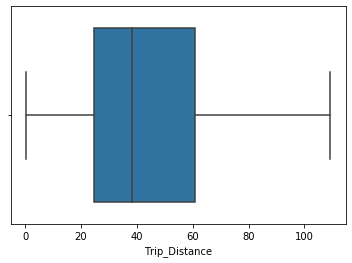

In [27]:
sns.boxplot(train.Trip_Distance)

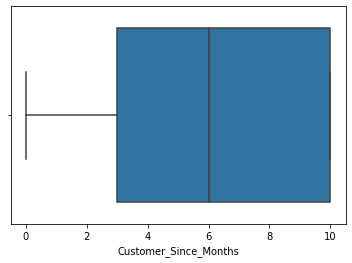

In [28]:
sns.boxplot(train.Customer_Since_Months)

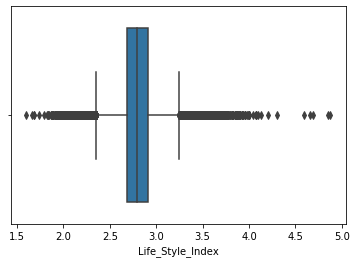

In [29]:
sns.boxplot(train.Life_Style_Index)

In [30]:
def treat_outlier(col,dataframe=train):
    IQR=dataframe[col].quantile(.75) - dataframe[col].quantile(.25)
    upper_bound=dataframe[col].quantile(.75) + (1.5*IQR)
    lower_bound=dataframe[col].quantile(.25) - (1.5*IQR)
    dataframe[col].clip(upper=upper_bound,lower=lower_bound,inplace=True)

In [31]:
treat_outlier('Life_Style_Index')

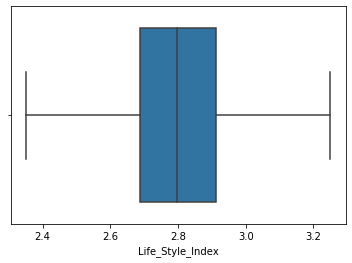

In [32]:
sns.boxplot(train.Life_Style_Index)

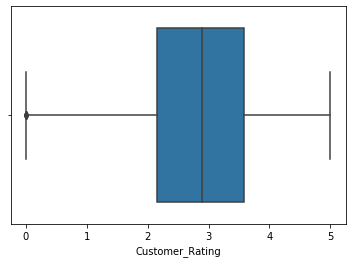

In [33]:
sns.boxplot(train.Customer_Rating)

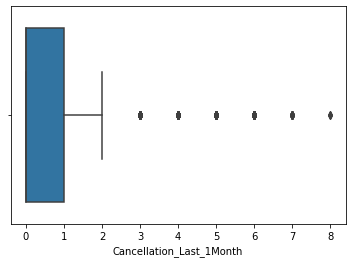

In [34]:
sns.boxplot(train.Cancellation_Last_1Month)

In [35]:
treat_outlier('Cancellation_Last_1Month')

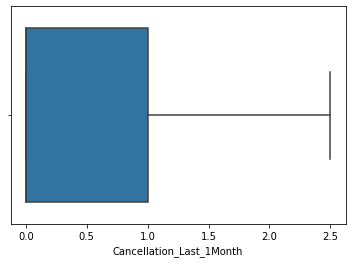

In [36]:
sns.boxplot(train.Cancellation_Last_1Month)

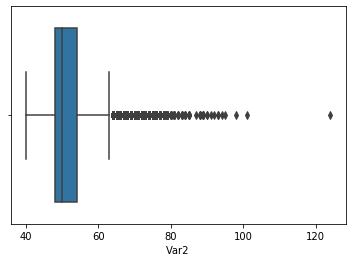

In [37]:
sns.boxplot(train.Var2)

In [38]:
treat_outlier('Var2')

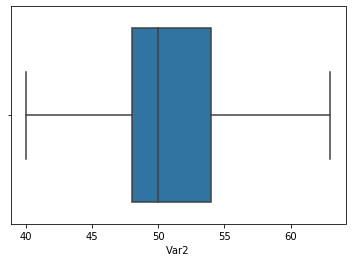

In [39]:
sns.boxplot(train.Var2)

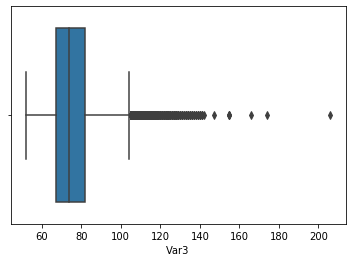

In [40]:
sns.boxplot(train.Var3)

In [41]:
treat_outlier('Var3')

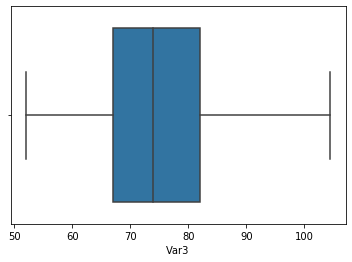

In [42]:
sns.boxplot(train.Var3)

# EDA ( **Exploratory Data Analysis**)

In [188]:
pd.pivot_table(train,values='Trip_Distance',index='Surge_Pricing_Type',columns='Type_of_Cab')

Type_of_Cab,A,B,C,D,E,F
Surge_Pricing_Type,,,,,,
1,41.240957,40.657820,39.992459,40.150404,41.211687,41.353988
2,41.562055,40.590158,42.232645,40.494544,41.096984,41.408025
3,53.869627,54.097988,46.496311,47.472285,53.423758,49.030499


- For type 3 surge pricing cab Type B has highest average trip distance traveled 
- For type 2 surge pricing cab Type C has highest average trip distance traveled 
- For type 1 surge pricing cab Type F has highest average trip distance traveled 

**But there is no vast difference, but surge price 3 have significant higher average trip distance than other surge type**

In [189]:
pd.pivot_table(train,values='Life_Style_Index',index='Surge_Pricing_Type',columns='Type_of_Cab')

Type_of_Cab,A,B,C,D,E,F
Surge_Pricing_Type,,,,,,
1,2.842294,2.821276,2.832851,2.833783,2.831828,2.840499
2,2.790586,2.793311,2.784871,2.784861,2.791007,2.792234
3,2.801970,2.807570,2.788261,2.785789,2.798678,2.788164


- For type 3 surge pricing cab Type B has highest average Life Style Index 
- For type 2 surge pricing cab Type B has highest average Life Style Index 
- For type 1 surge pricing cab Type A has highest average trip distance traveled 

**But there is no vast difference**

In [190]:
pd.pivot_table(train,values='Customer_Rating',index='Surge_Pricing_Type',columns='Type_of_Cab')

Type_of_Cab,A,B,C,D,E,F
Surge_Pricing_Type,,,,,,
1,3.143355,3.022295,3.120223,3.118108,3.092010,3.112337
2,2.852984,2.902044,2.790543,2.905731,2.843580,2.860415
3,2.678827,2.694742,2.753025,2.670393,2.661634,2.681426


- For type 3 surge pricing cab Type C has highest average Customer Rating
- For type 2 surge pricing cab Type D has highest average Customer Rating 
- For type 1 surge pricing cab Type A has highest average Customer Rating 

**But there is no vast difference,  To notice is that only in surge price 1 there were seen significant higher average ratings than other surge type **

In [191]:
pd.pivot_table(train,values='Cancellation_Last_1Month',index='Surge_Pricing_Type',columns='Type_of_Cab')

Type_of_Cab,A,B,C,D,E,F
Surge_Pricing_Type,,,,,,
1,0.479887,0.511793,0.521215,0.470892,0.473439,0.477289
2,0.618689,0.601878,0.717698,0.671247,0.634899,0.660613
3,1.054380,1.031276,0.862736,0.883458,0.952497,0.920109


- In surge price type 3 there were seen significant high average of cancellation, Cab Type A being Highest 
- Surge price type 1 had lowest cancellation , cab type D having the lowest amongst all 

In [193]:
pd.pivot_table(train,values='Var2',index='Surge_Pricing_Type',columns='Type_of_Cab')

Type_of_Cab,A,B,C,D,E,F
Surge_Pricing_Type,,,,,,
1,51.212926,51.206791,51.145612,51.285446,51.301957,51.250654
2,51.047830,50.959249,51.026778,50.866587,50.738490,50.940544
3,51.280319,51.551986,51.092292,51.182744,51.189892,51.170924


- No significant change is noticed in different surge price 

In [194]:
pd.pivot_table(train,values='Var3',index='Surge_Pricing_Type',columns='Type_of_Cab')

Type_of_Cab,A,B,C,D,E,F
Surge_Pricing_Type,,,,,,
1,76.237765,75.768300,76.407425,76.200000,76.324324,76.086445
2,74.617139,74.693673,74.636726,74.279570,74.340239,74.748236
3,74.835836,75.463018,74.645533,74.606649,74.816903,74.550204


- It is evident that Surge Price Type 1 have higher average var3, while other 2 types of surge price being morely same 

In [197]:
pd.pivot_table(train,values='Trip_Distance',index='Surge_Pricing_Type',columns='Confidence_Life_Style_Index')


Confidence_Life_Style_Index,A,B,C,D
Surge_Pricing_Type,,,,
1,32.030234,50.813936,46.166376,40.848046
2,30.713411,50.054023,43.831212,41.580882
3,29.826589,57.181536,50.176949,49.715511


- Surge Price Type 3 has the highest average trip distance in confidence life style index in Type B

In [198]:
pd.pivot_table(train,values='Life_Style_Index',index='Surge_Pricing_Type',columns='Confidence_Life_Style_Index')


Confidence_Life_Style_Index,A,B,C,D
Surge_Pricing_Type,,,,
1,2.808197,2.873304,2.872097,2.79805
2,2.745201,2.816399,2.807949,2.79805
3,2.709125,2.815948,2.802616,2.79805


- There is no major effect of Life Style Index over Surge Price Type by Confidence Life Style Index. Just a small evident high average life style index in surge price type 1 

In [199]:
pd.pivot_table(train,values='Customer_Rating',index='Surge_Pricing_Type',columns='Confidence_Life_Style_Index')


Confidence_Life_Style_Index,A,B,C,D
Surge_Pricing_Type,,,,
1,3.196169,3.006447,3.059613,3.147710
2,2.962960,2.765281,2.837519,2.853438
3,2.839719,2.610876,2.717383,2.678760


- Surge Price Type 1 has high average of customer rating 

In [200]:
pd.pivot_table(train,values='Cancellation_Last_1Month',index='Surge_Pricing_Type',columns='Confidence_Life_Style_Index')


Confidence_Life_Style_Index,A,B,C,D
Surge_Pricing_Type,,,,
1,0.481465,0.496822,0.487654,0.480603
2,0.628216,0.679155,0.650498,0.646984
3,0.920351,0.941515,0.890936,0.916802


- Surge Price Type 3 has the highest cancellation , Confidence Life Style Index Type B havin the highest 

In [201]:
pd.pivot_table(train,values='Var2',index='Surge_Pricing_Type',columns='Confidence_Life_Style_Index')


Confidence_Life_Style_Index,A,B,C,D
Surge_Pricing_Type,,,,
1,50.911996,51.440302,51.561799,51.095546
2,50.575289,51.288738,51.099949,50.923816
3,50.340516,51.598718,51.127712,51.177642


In [202]:
pd.pivot_table(train,values='Var3',index='Surge_Pricing_Type',columns='Confidence_Life_Style_Index')


Confidence_Life_Style_Index,A,B,C,D
Surge_Pricing_Type,,,,
1,75.220501,77.152379,76.759969,75.908525
2,73.074227,76.082962,74.967344,74.594535
3,71.793748,76.156284,74.480108,74.542073


In [203]:
pd.pivot_table(train,values='Trip_Distance',index='Surge_Pricing_Type',columns='Destination_Type')

Destination_Type,A,B,C,D,E,F,G,H,I,J,K,L,M,N
Surge_Pricing_Type,,,,,,,,,,,,,,
1,43.265397,43.393832,37.719066,26.121965,27.511463,39.214905,22.503327,26.036124,20.534545,19.019027,29.380732,42.747252,29.072105,16.847419
2,42.839695,43.073334,40.143249,27.128460,30.467166,42.694617,24.659816,24.570000,21.005524,18.873362,31.101814,43.274513,30.899231,19.207119
3,52.485218,52.471559,49.867754,32.152719,38.756131,50.450943,30.861460,29.556091,23.710536,19.890893,36.071000,50.121830,39.085000,21.388750


-Destination Type in common between all surge price type , i.e A,B,C have highest average trip distance respective to the surge type

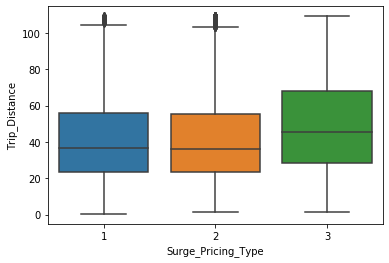

In [205]:
sns.boxplot(train.Surge_Pricing_Type,train.Trip_Distance)

We can see the overlapp in box plot for surge type 1 & 2 for trip distance , hence in 1 & 2 surge type there is similar trip distance travelled hence not contirbuting any difference between surge type 1 & 2 on basis of Trip Distance

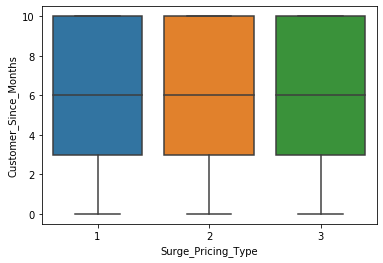

In [206]:
sns.boxplot(train.Surge_Pricing_Type,train.Customer_Since_Months)

- **Box plot of customer tenure for all the surge type overlaps hence customer since months does not contribute to surge type , hence it is a bad variable** 

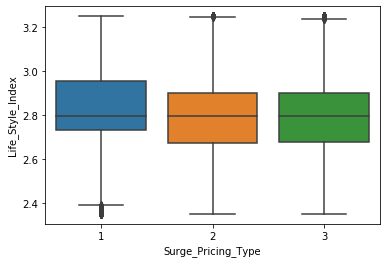

In [207]:
sns.boxplot(train.Surge_Pricing_Type,train.Life_Style_Index)

- Only suge type 1 shows higher life style index , while 2 & 3 overlaps hence does not explain any difference between the surge price type 

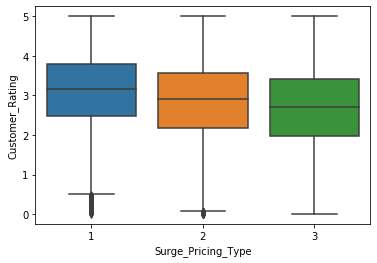

In [208]:
sns.boxplot(train.Surge_Pricing_Type,train.Customer_Rating)

- There is not any overlap of boxplot of Customer Rating on basis of Surge Type 

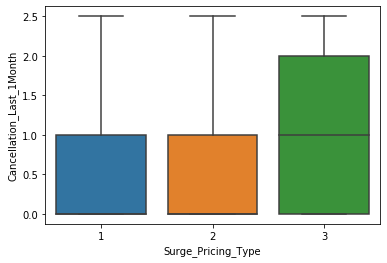

In [209]:
sns.boxplot(train.Surge_Pricing_Type,train.Cancellation_Last_1Month)

- We can see for surge price type 1 & 2 box plot of cancellations overlaps , i.e it does not explain difference in the two surge type . Only surge type 3 has significant change 

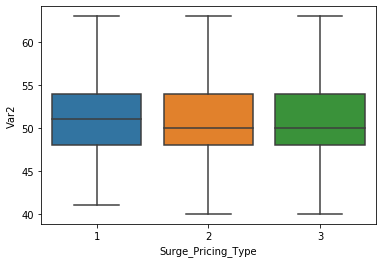

In [210]:
sns.boxplot(train.Surge_Pricing_Type,train.Var2)

- **Box Plot of Var2 Overlaps for all surge type**

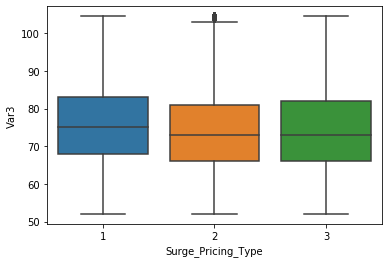

In [211]:
sns.boxplot(train.Surge_Pricing_Type,train.Var3)

- Overlap is there for surge type 2 & 3 for Var3 , the difference is explained only for surge type 1 

On whole if we see prominent variable customer rating explains difference in surge type better 

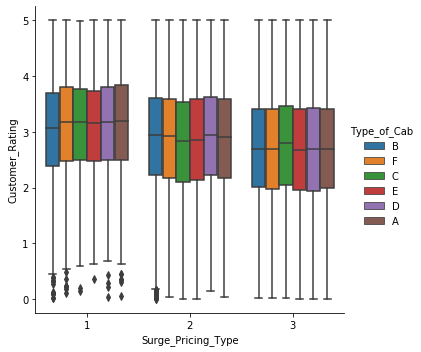

In [212]:
sns.catplot(x="Surge_Pricing_Type", y="Customer_Rating", hue="Type_of_Cab", kind="box", data=train)

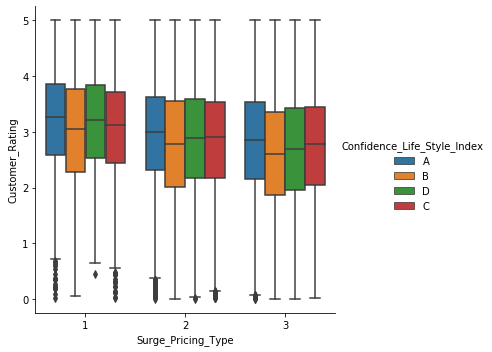

In [213]:
sns.catplot(x="Surge_Pricing_Type", y="Customer_Rating", hue="Confidence_Life_Style_Index", kind="box", data=train)

- Confidence Life Style Index Type **A** has higher customer Rating for all surge price type

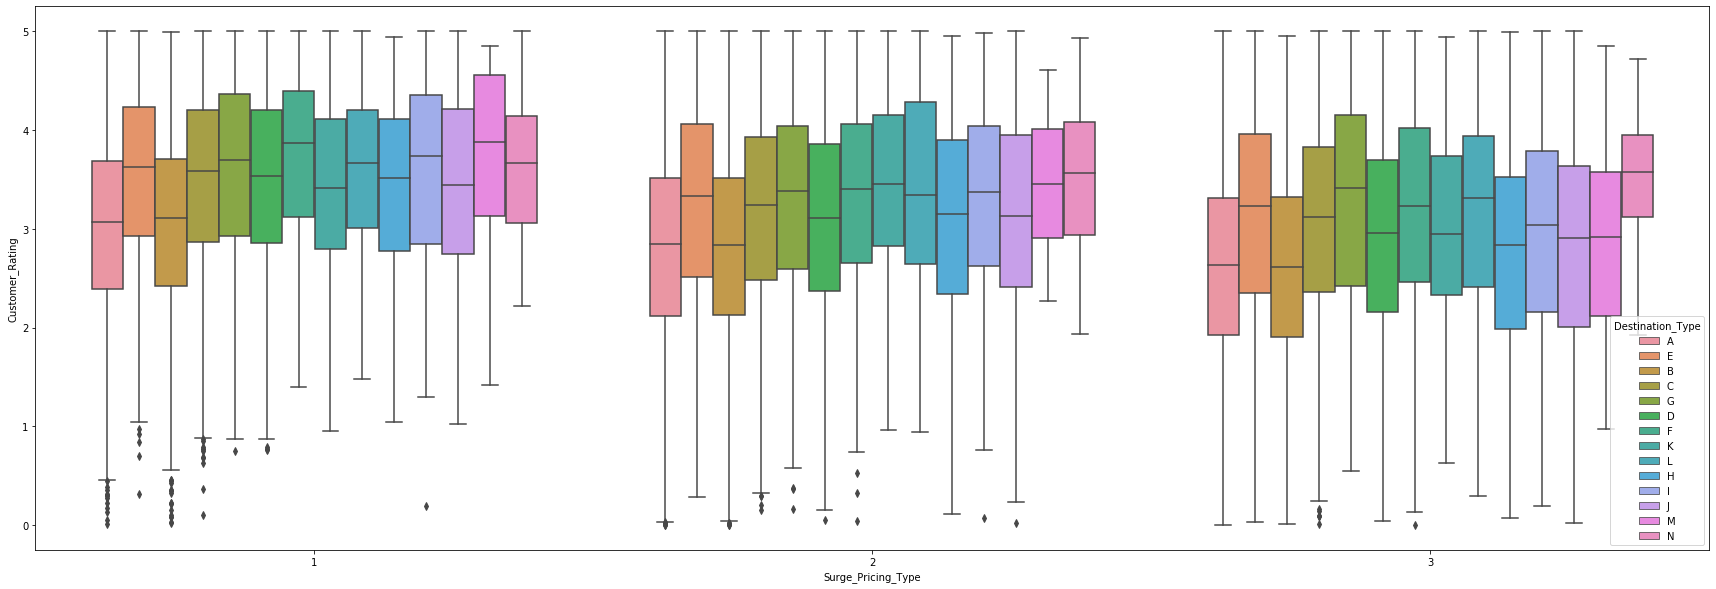

In [229]:
plt.figure(figsize=(30,10))
sns.boxplot(x="Surge_Pricing_Type", y="Customer_Rating", hue="Destination_Type",  data=train)

<Figure size 72x72 with 0 Axes>

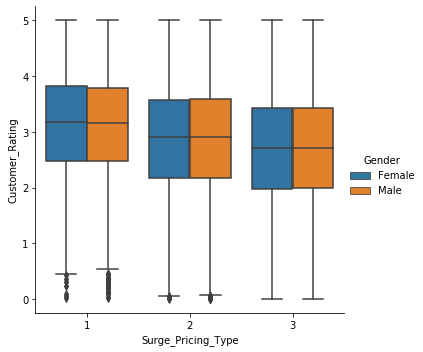

In [227]:
plt.figure(figsize=(1,1))
sns.catplot(x="Surge_Pricing_Type", y="Customer_Rating", hue="Gender", kind="box", data=train)

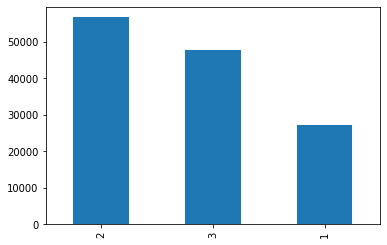

In [235]:
train.Surge_Pricing_Type.value_counts().plot(kind='bar')

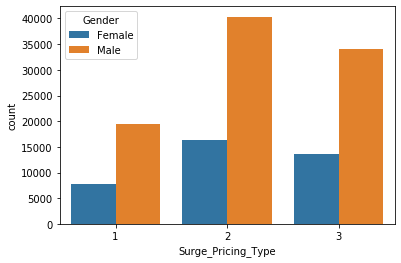

In [257]:
sns.countplot(train.Surge_Pricing_Type,hue=train.Gender)

Male pays more surge than females

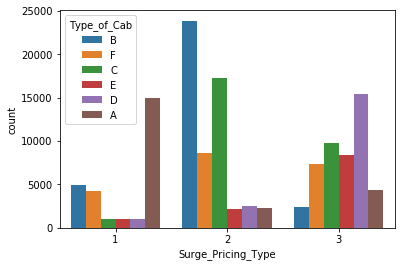

In [258]:
sns.countplot(train.Surge_Pricing_Type,hue=train.Type_of_Cab)

If we notice for different surge price type :

- Cab type A is preffered more when there is surge type 1 

- Cab type B & C is preffered more when there is surge type 2

- Cab type D is preffered more when there is surge type 3

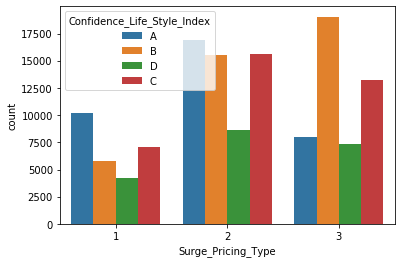

In [259]:
sns.countplot(train.Surge_Pricing_Type,hue=train.Confidence_Life_Style_Index )

For different surge pricing type:

- Confidence type A is more in Surge type 1

- Confidence type A,B & c is more in Surge type 2

- Confidence type B is more in Surge type 3

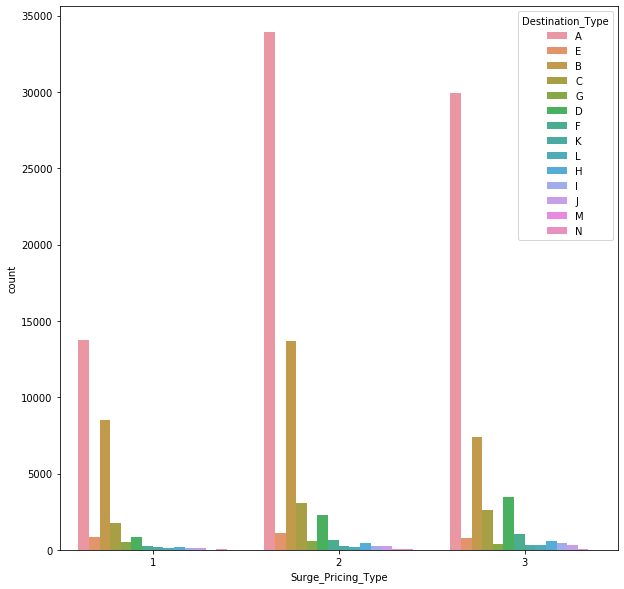

In [263]:
plt.figure(figsize=(10,10))
sns.countplot(train.Surge_Pricing_Type,hue=train.Destination_Type  )

Destination A & B have high frequency in different surge pricing type

## Final Comments on EDA :

- Probable Important variables are : Gender, Destination, Confidence Life Style Index, Type of Cab, Customer Rating,Var3, Cancellation 1 month, Life Style Index , Trip Distance

In [140]:
train.Surge_Pricing_Type.value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

### for our study we are converting this into binary variable , i.e interms of 0 & 1

where :

- 2 ->0
- 3->1

- 1 is inclueded in 2

In [141]:
train.Surge_Pricing_Type.replace(1,2,inplace=True)

In [142]:
train.Surge_Pricing_Type.value_counts()

2    83942
3    47720
Name: Surge_Pricing_Type, dtype: int64

In [143]:
train.Surge_Pricing_Type.replace(2,0,inplace=True)
train.Surge_Pricing_Type.replace(3,1,inplace=True)

In [170]:
train.Surge_Pricing_Type.value_counts()

0    83942
1    47720
Name: Surge_Pricing_Type, dtype: int64

# Pre-Processing Data 

In [264]:
train.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month       float64
Var2                             int64
Var3                           float64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

#### one-hot-encoding 

In [43]:
d_Type_Cab=pd.get_dummies(train['Type_of_Cab'],prefix='Cab_Type')

In [44]:
d_CLI=pd.get_dummies(train['Confidence_Life_Style_Index'],prefix='CLI')

In [45]:
d_Dest_Type=pd.get_dummies(train['Destination_Type'],prefix='Dest_Type')

In [46]:
d_Gender=pd.get_dummies(train['Gender'],prefix='Gender',drop_first=True)

In [47]:
d_Type_Cab.drop('Cab_Type_F',axis=1,inplace=True)

In [48]:
d_CLI.drop('CLI_D',axis=1,inplace=True)

In [49]:
d_Dest_Type.drop('Dest_Type_N',axis=1,inplace=True)

In [50]:
train.drop(['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type','Gender'],axis=1,inplace=True)

In [171]:
train_f=pd.concat([train,d_Type_Cab,d_CLI,d_Dest_Type,d_Gender],axis=1)

In [52]:
train_f.head()

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type,Cab_Type_A,...,Dest_Type_E,Dest_Type_F,Dest_Type_G,Dest_Type_H,Dest_Type_I,Dest_Type_J,Dest_Type_K,Dest_Type_L,Dest_Type_M,Gender_Male
0,T0005689460,6.77,1.0,2.42769,3.90500,0.0,46,60.0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,T0005689461,29.47,10.0,2.78245,3.45000,0.0,56,78.0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,T0005689464,41.58,10.0,2.79805,3.50125,2.0,56,77.0,2,0,...,1,0,0,0,0,0,0,0,0,1
3,T0005689465,61.56,10.0,2.79805,3.45375,0.0,52,74.0,3,0,...,0,0,0,0,0,0,0,0,0,1
4,T0005689467,54.95,10.0,3.03453,3.40250,2.5,49,102.0,2,0,...,0,0,0,0,0,0,0,0,0,1


In [172]:
train_f.columns

Index(['Trip_ID', 'Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3',
       'Surge_Pricing_Type', 'Cab_Type_A', 'Cab_Type_B', 'Cab_Type_C',
       'Cab_Type_D', 'Cab_Type_E', 'CLI_A', 'CLI_B', 'CLI_C', 'Dest_Type_A',
       'Dest_Type_B', 'Dest_Type_C', 'Dest_Type_D', 'Dest_Type_E',
       'Dest_Type_F', 'Dest_Type_G', 'Dest_Type_H', 'Dest_Type_I',
       'Dest_Type_J', 'Dest_Type_K', 'Dest_Type_L', 'Dest_Type_M',
       'Gender_Male'],
      dtype='object')

In [173]:
categ_var=[ 'Cab_Type_A', 'Cab_Type_B', 'Cab_Type_C',
       'Cab_Type_D', 'Cab_Type_E', 'CLI_A', 'CLI_B', 'CLI_C', 'Dest_Type_A',
       'Dest_Type_B', 'Dest_Type_C', 'Dest_Type_D', 'Dest_Type_E',
       'Dest_Type_F', 'Dest_Type_G', 'Dest_Type_H', 'Dest_Type_I',
       'Dest_Type_J', 'Dest_Type_K', 'Dest_Type_L', 'Dest_Type_M',
       'Gender_Male']
cont_var=['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3']
Dependent_Var='Surge_Pricing_Type'

In [174]:
cont_train=train_f[cont_var]
categ_train=train_f[categ_var]
Y_data=train_f[[Dependent_Var]]

In [175]:
Y_data.Surge_Pricing_Type.value_counts()

0    83942
1    47720
Name: Surge_Pricing_Type, dtype: int64

#### Normalization 

In [176]:
norm_object=Normalizer()
Cont_train=pd.DataFrame(norm_object.fit_transform(cont_train),columns=[cont_var])

In [177]:
Final_Train=pd.concat([Cont_train,categ_train],axis=1)

## Splitting Data

In [178]:
Final_Train.shape

(131662, 29)

In [179]:
X_train,X_test,y_train,y_test=tts(Final_Train,Y_data,test_size=.50,random_state=20)

In [180]:
y_train.Surge_Pricing_Type.value_counts()

0    42037
1    23794
Name: Surge_Pricing_Type, dtype: int64

# Model Development - Scratch

In [60]:
def sigmoid(X):
    sigmoid_d=(1/(1+np.exp(-X)))
    return sigmoid_d

In [83]:
def initialize_weight(data):
    w=np.random.randn(data.shape[1],1)
    b=0.0
    return w,b

In [107]:
def Propogate(X,y,y_col):
    w,b=initialize_weight(X)
    m=X.shape[0]
    #forward pass
    z=np.dot(X,w)+b
    z=z.reshape(1,-1)
    A=sigmoid(z)
    yt=np.array(y[y_col])
    yt=yt.reshape(1,-1)
    #Backward Pass
    dz=A-yt
    cost=(-1/m)*np.sum(yt*np.log(A)+(1-yt)*np.log(1-A))
    dw=(1/m)*(np.dot(dz,X))
    dw=dw.reshape(-1,1)
    db=(1/m)*np.sum(dz)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"w":w,"dw": dw,
             "db": db,'b':b}
    
    return grads, cost
    
    
    

In [181]:
x_train,x_val,Y_train,Y_val=tts(X_train,y_train,test_size=.90,random_state=20)
grads,cost=Propogate(x_train,Y_train,'Surge_Pricing_Type')

### Gradient Descent Optimization

In [112]:
def optimize(X, Y, num_iterations, learning_rate, print_cost = False):
    costs=[]
    for i in range(num_iterations):
        grads, cost = Propogate(X, Y,'Surge_Pricing_Type')
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        w=grads['w']
        b=grads['b']
        # update rule 
        w = w - learning_rate*dw
        b = b - learning_rate*db
         # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs
    

In [113]:
params, grads, costs = optimize( x_train, Y_train, num_iterations= 100, learning_rate = 0.009, print_cost = False)

In [192]:
def predict(w, b, X):
    
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[1], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    z=np.dot(X,w)+b
    z=z.reshape(1,-1)
    A = sigmoid(z) 
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        
        if A[0,i]< 0.7:
            Y_prediction[0,i] = 0
        else: 
            Y_prediction[0,i] = 1
        
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [155]:
w=params['w']
b=params['b']
v=predict(w,b,x_train)

In [193]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    

    # Gradient descent 
    parameters, grads, costs = optimize(X_train, Y_train, num_iterations, learning_rate, print_cost = True)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    #print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train.T)) * 100))
    #print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test.T)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [199]:
d = model(x_train, Y_train, x_val, Y_val, num_iterations = 2000, learning_rate = 0.5, print_cost = True)

Cost after iteration 0: 0.787897
Cost after iteration 100: 1.233572
Cost after iteration 200: 1.105022
Cost after iteration 300: 1.059571
Cost after iteration 400: 0.902436
Cost after iteration 500: 1.379023
Cost after iteration 600: 0.850925
Cost after iteration 700: 0.982005
Cost after iteration 800: 1.355756
Cost after iteration 900: 0.679847
Cost after iteration 1000: 2.386155
Cost after iteration 1100: 0.766999
Cost after iteration 1200: 1.736289
Cost after iteration 1300: 1.103519
Cost after iteration 1400: 0.965178
Cost after iteration 1500: 1.079888
Cost after iteration 1600: 1.194721
Cost after iteration 1700: 1.404762
Cost after iteration 1800: 0.864293
Cost after iteration 1900: 1.054425
train accuracy: 94674     100.0
49699       0.0
76251     100.0
104731    100.0
54113     100.0
          ...  
7844        0.0
105808    100.0
93960       0.0
39447       0.0
123407    100.0
Length: 6583, dtype: float64 %


In [138]:
pred=d['Y_prediction_train']

In [200]:
y_t_pr=d['Y_prediction_train']
y_pr=d['Y_prediction_test']

In [203]:
y_t_pr[y_t_pr==1].shape

(2406,)

In [202]:
Y_train.Surge_Pricing_Type.value_counts()

0    4243
1    2340
Name: Surge_Pricing_Type, dtype: int64

In [206]:
y_pr[y_pr==0].shape

(37411,)

In [205]:
Y_val.Surge_Pricing_Type.value_counts()

0    37794
1    21454
Name: Surge_Pricing_Type, dtype: int64